# ECE 4950 Assignment 5 

## Coding (Support Vector Machines): Digit classification using SVM

We consider hand written digit recognition, MNIST. Please visit http://yann.lecun.com/exdb/mnist/ for more information about the original MNIST dataset.

In this competition, you will be given images of hand written digits. Each image is grayscale, and 28 by 28 pixels. Your goal is to design a classifier for this problem (output digits from 0 to 9).

Make sure you have installed the package scikit-image:

``
    pip3 install scikit-image
``

or 


``
    conda install scikit-image
``

You can use the following script to load data.

In [1]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
data_path = "./mnist.mat"
data_raw = loadmat(data_path)
images = data_raw['data'].T
label = data_raw['label'][0]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also provided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

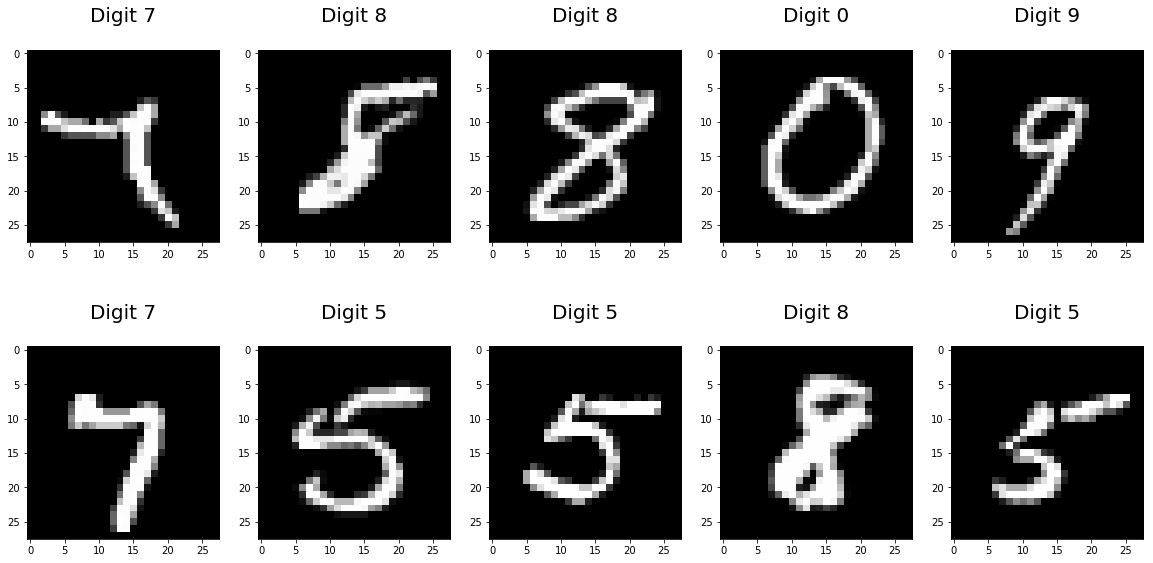

In [2]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,10))
for i in range(10,20):
    plt.subplot(2, 5, i-9)
    t = random.randint(0,70000)
    plt.imshow(np.reshape(images[t,:], (28,28)), cmap = plt.cm.gray)
    plt.title('Digit %i\n' %label[t], fontsize = 20)

### Sampling, Normalization and Data splitting

To make training faster, we only take 10% of the data randomly. Then we further reduce the dimension of the data by taking the average of each  Then we split the data into training and testing set and normalize them by max norm.

In [3]:
from sklearn.model_selection import train_test_split
X_new, X_unused, Y_new, Y_unused = train_test_split(images, label, test_size = 0.9, random_state = 1000)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 1000) # split the dataset into training and testing sets
X_trn = X_trn/256
X_tst = X_tst/256

### Image Rescaling
To make the training even faster. The next code block rescale all the images by reducing the height and width of the image both by half. We make each $2\time 2$ block in the orginal image into a single pixel in the new image. The resulting value of the pixels in the new image will be the average of the original four pixels.

Then we get new images with $14 \times 14$ in size and stores in the rows of X_trn_new and X_tst_new.

In [4]:
from skimage.transform import rescale, resize, downscale_local_mean
m, n = X_trn.shape
n_new = n//4
X_trn_new = np.zeros((m,n_new))
for i in range(m):
    image = np.reshape(X_trn[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_trn_new[i,:] = np.reshape(image_rescaled, n_new)

m2 = X_tst.shape[0]
X_tst_new = np.zeros((m2,n_new))
for i in range(m2):
    image = np.reshape(X_tst[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_tst_new[i,:] = np.reshape(image_rescaled, n_new)
    
print('The new training set has size: '+ str(X_trn_new.shape))
print('The new testing set has size: '+ str(X_tst_new.shape))

C:\Users\qyzen\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\Users\qyzen\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The new training set has size: (4900, 196)
The new testing set has size: (2100, 196)


## 1. Linear SVM
Run a linear SVM for the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?

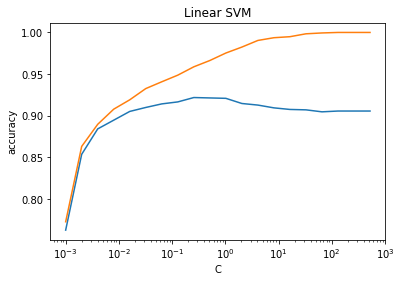

The maximum testing accuracy achieved with Linear SVM is: 0.9219047619047619


In [5]:
from sklearn.svm import SVC
n = np.array(range(20))
C = 0.001*(2**n)
accuracy_tst = []
accuracy_trn = []
#========Your Code Here============
for i in range(20):
    clf = SVC(C=C[i],kernel='linear',gamma = 'auto')
    clf.fit(X_trn_new, Y_trn)
    accuracy_trn.append(clf.score(X_trn_new, Y_trn))
    accuracy_tst.append(clf.score(X_tst_new, Y_tst))
max_acc = max(accuracy_tst)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("Linear SVM")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with Linear SVM is: ' + str(max_acc))

1. At begining, with the increasement of $C$, both training accuracy and testing accuracy inceases accordingly, this is underfitting. Then, when $C$ continously growing bigger, training accuracy first increase and then basically remain unchanged, testing accuracy drops as $C$ continously going up and then also stay unchanged, this is overfitting.

2. The maximum testing accruracy achieved among all penalty parameters for linear SVM is 0.92190.

## 2. Polynomial SVM
Run an SVM with polynomial kernal of degree $2, 3, 4$ with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with polynomial kernal of each degree? Compare it with linear SVM and explain.

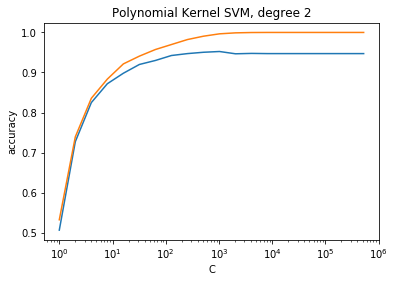

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2 is: 0.9523809523809523


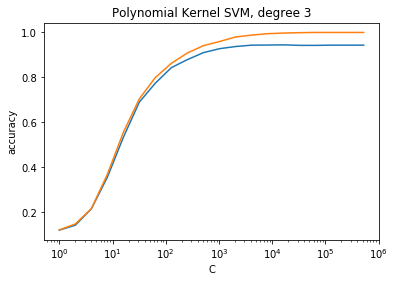

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 3 is: 0.9447619047619048


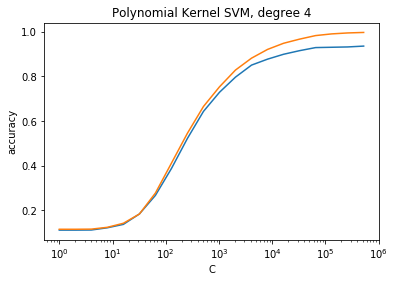

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 4 is: 0.9357142857142857


In [6]:
from sklearn.svm import SVC
D = [2, 3, 4]
n = np.array(range(20))
C = 2**n
max_acc = np.zeros(3)
for i in range(3):
    accuracy_tst = []
    accuracy_trn = []
    d = D[i]
    #========Your Code Here============
    for j in range(20):
        clf = SVC(C=C[j],kernel='poly',degree=d,gamma = 'auto')
        clf = clf.fit(X_trn_new, Y_trn)
        accuracy_trn.append(clf.score(X_trn_new, Y_trn))
        accuracy_tst.append(clf.score(X_tst_new, Y_tst))
    max_acc[i]= max(accuracy_tst)
    #=============================
    plt.semilogx(C, accuracy_tst)
    plt.semilogx(C, accuracy_trn)
    plt.title("Polynomial Kernel SVM, degree %i" %d)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.show()
    print('The maximum testing accuracy achieved with Polynomial Kernel SVM of degree ' + str(d) + ' is: ' + str(max_acc[i]))

1.For kernel with degree 2, both training accuracy and testing accuracy inceases with repect to the increasement of penalty parameter $C$ at the begining, this is underfitting. Then when we continuously increase $C$, training accuracy basically remain unchanged but testing accuray even droped a little bit, this is overfitting.

For kernel with degree 3, both training accuracy and testing accuracy inceases with repect to the increasement of penalty parameter $C$ at the begining, this is underfitting. Then when we continuously increase $C$, training accuracy basically remain unchanged and testing accuray no longer increase as well, this is overfitting.

For kernel with degree 4, although with different increasing rate at different $C$ value, both training accuracy and testing accuracy inceases with repect to the increasement of penalty parameter $C$ at all time, this is underfitting.

2.The maximum testing accruracy achieved among all penalty parameters for SVM with polynomial kernal with degree 2 is 0.95238, with degree 3 is 0.94476, with degree 4 is 0.93571. These are all higher than linear SVM because polynomial model is more complicated than linear model and fits the data better.

## 3. SVM with Gaussian Kernal.
Run an SVM with Gaussian kernal with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal of each degree? Compare it with linear SVM and polynomial SVM and explain.

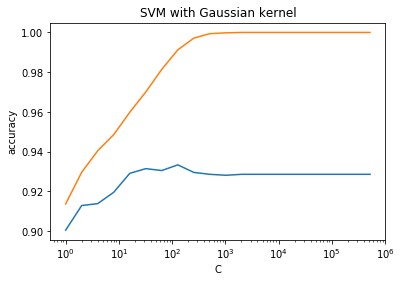

The maximum testing accuracy achieved with SVM with Gaussian kernel is: 0.9333333333333333


In [7]:
from sklearn.svm import SVC
accuracy_tst = []
accuracy_trn = []
n = np.array(range(20))
C = 2**n
#========Your Code Here============
for i in range(20):
    clf = SVC(C=C[i],kernel='rbf',gamma = 'auto')
    clf = clf.fit(X_trn_new, Y_trn)
    accuracy_trn.append(clf.score(X_trn_new, Y_trn))
    accuracy_tst.append(clf.score(X_tst_new, Y_tst))
max_acc = max(accuracy_tst)

#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("SVM with Gaussian kernel")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with SVM with Gaussian kernel is: ' + str(max_acc))

1. At begining, with the increasement of $C$, both training accuracy and testing accuracy inceases accordingly, this is underfitting. Then, when $C$ continously growing bigger, training accuracy first increase and then basically remain unchanged, testing accuracy drops as $C$ going up and then also stay unchanged, this is overfitting.

2. The maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal is 0.933. It is higher than linear SVM but lower than SVM with polynomial kernal of degree 2, 3, 4. SVM with Guassian kernel is more complicated than with linear kernel, it fits the data better, thus has a higher accuracy. But its accuracy is lower than polynomial ones, this means polynomial kernel might be a better fit with regards to the current data sets than Gaussian kernel.